In [1]:
import sympy as sm
import sympy.physics.mechanics as me
me.init_vprinting()

In [2]:
w, L = sm.symbols('omega, L')
q1, q2, q3 = me.dynamicsymbols('q1:4')
t = me.dynamicsymbols._t

In [3]:
A, B, E = sm.symbols('A, B, E', cls=me.ReferenceFrame)

In [4]:
B.orient(A, 'Axis', (w*t, A.y))

In [5]:
E.orient(B, 'Axis', (q3, B.z))

Once the orientations are defined, the angular velocity between any two frames can be calclated.

In [6]:
E.ang_vel_in(A)

For anglar velocities, the addition thereom is applied when `ang_vel_in()` is called.

In [7]:
AwE = B.ang_vel_in(A) + E.ang_vel_in(B)
AwE

Calling `ang_acc_in()` takes the time derivative of the angular velocity.

In [8]:
AwE.dt(A)

In [9]:
E.ang_acc_in(A)

# Define locations of points

In [10]:
O, P1, P2 = sm.symbols('O, P1, P2', cls=me.Point)

The locations of the points must be defined with respect to each other. It is sufficient to define the location of a point to a single other point and as long as there is a "link" through adjacent points SymPy will calculate the positions between any pair of points.

In [11]:
P1.set_pos(O, q1*B.x + q2*B.y)

In [12]:
P1.pos_from(O)

In [13]:
O.pos_from(P1)

Here I define P2 relative to P1 and then P2 relative to O is automatically calculated.

In [14]:
P2.set_pos(P1, L*E.x)

In [15]:
P2.pos_from(O)

# Define and calculate velocities

O is fixed in A and we are using that as the point we reference all other points from. Thus we need to specify it's velocity as zero in A.

In [16]:
O.set_vel(A, 0)

The velocities of points must be set explicitly. For example, the velocity of P1 in B can be found like so:

In [17]:
P1.pos_from(O).dt(B)

The following two commands are equivalent:

In [18]:
P1.set_vel(B, P1.pos_from(O).dt(B))

In [19]:
P1.set_vel(B, q1.diff(t)*B.x + q2.diff(t)*B.y)

Now the velocity of P1 in B can ve retrieved with:

In [20]:
P1.vel(B)

In [21]:
P1.set_vel(A, P1.pos_from(O).dt(A))

In [22]:
P1.vel(A)

## Two point theorem for P1 and P2 fixed in E

The velocity of P2 can be found using the two point theorem and the fact that P1 and P2 are fixed in E.

In [23]:
P1.vel(A) + me.cross(E.ang_vel_in(A), P2.pos_from(P1))

The `v2pt_theory()` method will calculate and set the velocity.

In [24]:
P2.v2pt_theory(P1, A, E)

In [25]:
P2.vel(A)

Similarly, the acceleration can be computed. Note that no accelerations have to be set explicitly. SymPy will take the necessary derivatives behind the scenes.

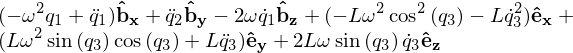

In [26]:
P2.a2pt_theory(P1, A, E)

Expressing in B and simplifying gives the same answer as presented in class by hand.

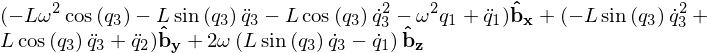

In [27]:
P2.acc(A).express(B).simplify()

## One point theorem

Start over with new points so we don't inherit velocities and accelerations calculated above.

In [28]:
O, P1, P2 = sm.symbols('O, P1, P2', cls=me.Point)
P1.set_pos(O, q1*B.x + q2*B.y)
P2.set_pos(P1, L*E.x)
O.set_vel(A, 0)
P1.set_vel(B, P1.pos_from(O).dt(B))

Alternatively, the one point theorem can be used to find the velocities of P1 and P2 in A if we treat points P1 and P2 as points moving in B.

In [29]:
P1.v1pt_theory(O, A, B)

This returns the same result above where we used `dt()` directly to take the derivative in A. It is equivalent to:

In [30]:
P1.vel(B) + me.cross(B.ang_vel_in(A), P1.pos_from(O))

Similarly for the acceleration:

In [31]:
P1.a1pt_theory(O, A, B)

Once `v1pt_theory()` and `a1pt_theory()` are called the calculated velocities are set and available:

In [32]:
P1.vel(A)

In [33]:
P1.acc(A)

# P2 with one point theorem

Applying the 1 point theorem as explained in class is shown below:

$$
^A\mathbf{V}^{P_2} =
^B\mathbf{V}^{P_2} +
^A\mathbf{V}^{B^*} \\
^A\mathbf{V}^{B^*} =
^A\mathbf{\omega}^B \times \mathbf{r}^{B^*/O}
$$

Note that I use P2 below for $B^*$.

In [34]:
P2.set_vel(B, P2.pos_from(O).dt(B))
P2.vel(B) + me.cross(B.ang_vel_in(A), P2.pos_from(O))

In class, I asked you to use `v1pt_theory()` to find the velocity of $P_2$. My mistake was that I was attempting to use $P_1$ as the point which the velocity is known. But $P_1$ is not fixed in B. Note that I needed to use point O which is fixed in B.

In [35]:
# what I did in class, which is incorrect:
# P2.v1pt_theory(P1, A, B)
# P2.a1pt_theory(P1, A, B)

In [36]:
P2.v1pt_theory(O, A, B)

And similarly, using `a1pt_theory()`, which gives the correct result.

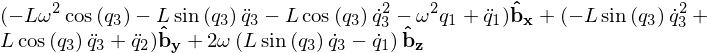

In [37]:
P2.a1pt_theory(O, A, B).express(B).simplify()